In [244]:
import pandas as pd
import numpy as np
## Load the data into a DataFrame
df = pd.read_csv('datasets/challenge-dataset.csv')
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011


In [245]:
df2 = pd.read_csv('datasets/ranking-submission.csv')
df2.head()

,world_rank,university_name,total_score
0,1,California Institute of Technology,NaN
1,2,University of Oxford,NaN
2,3,Stanford University,NaN
3,4,University of Cambridge,NaN
4,5,Massachusetts Institute of Technology,NaN


In [246]:
for x in df.columns:
    print df[x].unique()

['1' '2' '3' '4' '5' '6' '8' '9' '10' '11' '12' '13' '14' '15' '17' '18'
 '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '32' '33' '34'
 '35' '36' '37' '38' '39' '40' '41' '42' '43' '47' '48' '49' '51' '52' '53'
 '54' '55' '56' '57' '58' '59' '60' '61' '63' '64' '65' '66' '67' '68' '71'
 '72' '73' '75' '76' '77' '78' '79' '81' '83' '85' '86' '87' '88' '89' '90'
 '93' '94' '95' '98' '99' '100' '101' '102' '103' '104' '105' '106' '107'
 '109' '111' '112' '114' '115' '117' '118' '119' '120' '122' '124' '127'
 '128' '129' '130' '132' '135' '136' '137' '138' '139' '140' '142' '143'
 '144' '145' '147' '149' '151' '152' '155' '156' '158' '159' '161' '163'
 '164' '165' '167' '168' '170' '171' '172' '173' '174' '177' '178' '181'
 '182' '183' '184' '185' '186' '187' '189' '190' '193' '195' '196' '197'
 '199' '7' '16' '31' '44' '45' '46' '62' '69' '70' '74' '80' '84' '91' '92'
 '96' '97' '108' '110' '113' '116' '121' '123' '125' '131' '133' '134'
 '141' '146' '148' '150' '154' '157' 

In [247]:
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

change international to float

change - to nan
change income to float

change total score to float

change num students to int

strip % from international_students
change international_students to float

drop female_male_ratio

In [248]:
def change_to_float(inpt, replace):
    if type(inpt) == float:
        return inpt
    else:
        return inpt.replace(replace,'')

In [249]:
df['international'] = df['international'].replace('-',np.nan).astype(float)
df['income'] = df['income'].replace('-',np.nan).astype(float)
df['total_score'] = df['total_score'].replace('-',np.nan).astype(float)
df['num_students'] = df['num_students'].apply(lambda x: change_to_float(x,',')).astype(float)
df['international_students'] = df['international_students'].apply(lambda x: change_to_float(x,'%')).astype(float)

In [250]:
del df['female_male_ratio']

In [251]:
score_2016 = df[df['year'] == 2016]
score_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,NaN,2243.0,6.9,27.0,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,NaN,19919.0,11.6,34.0,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,NaN,15596.0,7.8,22.0,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,NaN,18812.0,11.8,34.0,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,NaN,11074.0,9.0,33.0,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,NaN,20152.0,8.9,25.0,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,NaN,7929.0,8.4,27.0,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,NaN,15060.0,11.7,51.0,2016
1811,9,ETH Zurich � Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,NaN,18178.0,14.7,37.0,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,NaN,14221.0,6.9,21.0,2016


In [252]:
df.shape

(2603, 13)

In [253]:
df.dropna(inplace=True)

In [254]:
df.shape

(846, 13)

In [255]:
# set the X matrix/DataFrame (IVs) and use the feature names as cols
df_X = df.drop(['total_score','world_rank','university_name','country'], axis=1)

# set the y vector/Series (DV)
df_y = df['total_score']


In [256]:
type(df_X)

pandas.core.frame.DataFrame

In [257]:
type(df_y)

pandas.core.series.Series

In [258]:
df_X.shape

(846, 9)

In [259]:
X = df_X
y = df_y

In [260]:
X.shape

(846, 9)

In [261]:
y.shape

(846,)

## Fit a standard linear regression

In [262]:
from sklearn import linear_model

# import our estimator
lr = linear_model.LinearRegression()

In [263]:
# fit our model using our data and target
lr_model = lr.fit(X, y)

## Get the r<sup>2</sup>

In [264]:
from sklearn.metrics import r2_score

y_true = y
y_pred = lr_model.predict(X)

lr_r2 =  r2_score(y_true=y_true, y_pred=y_pred)

In [265]:
lr_r2

0.99956457485507832

## Plot our predictions vs. actual values

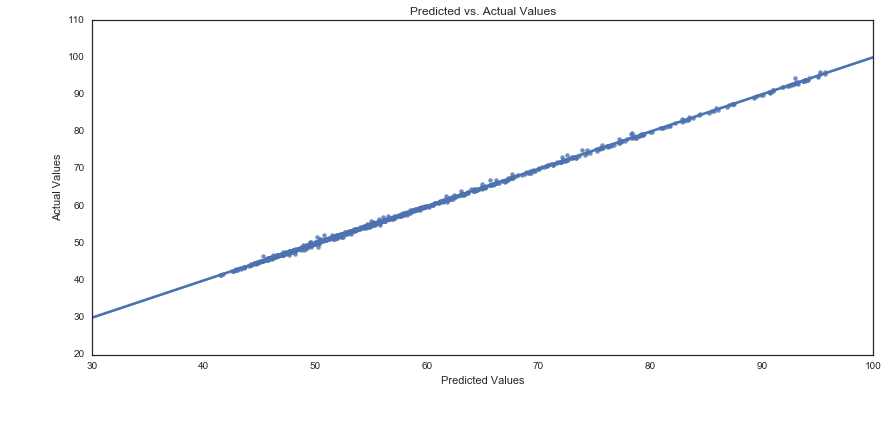

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

ax = sns.regplot(y_pred, y_true)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
plt.annotate('r-squared = ' + str(round(lr_r2,2)), xy=(41,-7), fontsize=12)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values');

## Get the coefficients (betas)

In [267]:
# each feature has an associated coefficient
len(lr_model.coef_)

9

In [268]:
# we can retrieve those
lr_model.coef_

array([  2.98166897e-01,   6.88080180e-02,   3.01244327e-01,
         3.04071075e-01,   2.56568348e-02,   9.34685651e-07,
         2.98748135e-04,   3.16131949e-03,  -6.20311840e-02])

## Mean abs. value of the coefficients

In [269]:
abs(lr_model.coef_).mean()

0.11815992643596893

In [270]:
lr_model.coef_.max()

0.30407107502381975

## Let's re-model it using regularization

In [271]:
# we'll use LASSO, aka L1
lasso = linear_model.Lasso(alpha=1)

In [272]:
# next we fit
lasso_model = lasso.fit(X, y)

## Get the r<sup>2</sup>

In [273]:
y_true_lasso = y
y_pred_lasso = lasso_model.predict(X)

lasso_r2 =  r2_score(y_true=y_true_lasso, y_pred=y_pred_lasso)

In [274]:
lasso_r2

0.99945249972842143

## Get the coefficients (betas)

In [275]:
len(lasso_model.coef_)

9

In [276]:
lasso_model.coef_

array([  2.95315589e-01,   6.69807287e-02,   3.03580106e-01,
         2.98731925e-01,   2.25992089e-02,  -1.74850040e-06,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00])

## Mean of absolute value of the coefficients

In [277]:
abs(lasso_model.coef_).mean()

0.10968992297619996

In [278]:
lasso_model.coef_.max()

0.30358010602178431

In [279]:
from sklearn.metrics import mean_squared_error
print "MSE Lasso:", mean_squared_error(y_true_lasso, y_pred_lasso)
print "MSE linear:", mean_squared_error(y_true, y_pred)


MSE Lasso: 0.0900244642727
MSE linear: 0.0715961570018


In [280]:
# we'll use RIdge, aka L2
ridge = linear_model.Ridge(alpha=1)

In [281]:
# next we fit
ridge_model = ridge.fit(X, y)

In [282]:
y_true_ridge = y
y_pred_ridge = ridge_model.predict(X)

ridge_r2 =  r2_score(y_true=y_true_ridge, y_pred=y_pred_ridge)

In [283]:
ridge_r2

0.99956457482833694

In [284]:
len(ridge_model.coef_)

9

In [285]:
ridge_model.coef_

array([  2.98166011e-01,   6.88064060e-02,   3.01244520e-01,
         3.04068898e-01,   2.56565599e-02,   9.34576768e-07,
         2.98062203e-04,   3.16434550e-03,  -6.19869250e-02])

In [286]:
abs(ridge_model.coef_).mean()

0.11815474029386393

In [287]:
ridge_model.coef_.max()

0.30406889807970805

In [288]:
print "MSE linear:", mean_squared_error(y_true, y_pred)
print "MSE Lasso:", mean_squared_error(y_true_lasso, y_pred_lasso)
print "MSE Ridge:", mean_squared_error(y_true_ridge, y_pred_ridge)


MSE linear: 0.0715961570018
MSE Lasso: 0.0900244642727
MSE Ridge: 0.0715961613988


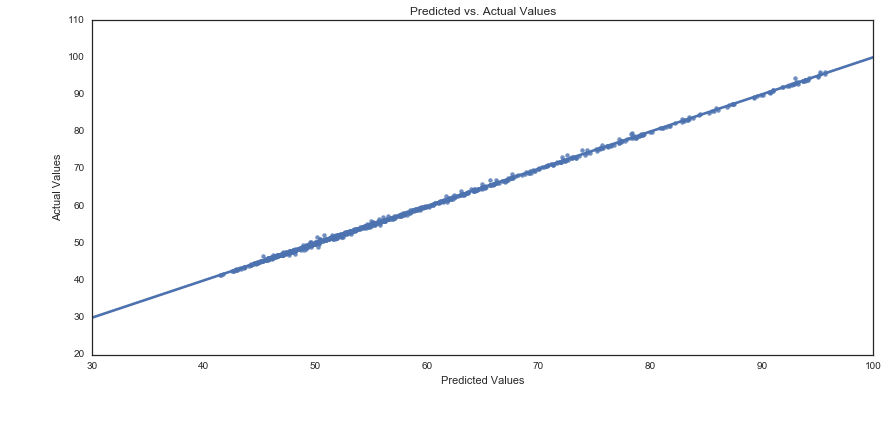

In [289]:
ax = sns.regplot(y_pred_ridge, y_true_ridge)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
plt.annotate('r-squared = ' + str(round(lr_r2,2)), xy=(41,-7), fontsize=12)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values');

In [290]:
len(y_pred_ridge)

846

In [313]:
score_2016 = df.drop(['total_score','world_rank','university_name','country'], axis=1)

score_2016['total_score'] = pd.Series(ridge_model.predict(score_2016))

In [310]:
y_hat.to_csv('ranking-submission.csv')

In [323]:
score_2016['university_name'] = df['university_name']

In [324]:
score_2016['world_rank'] = 

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year,total_score,university_name
0,99.7,72.4,98.7,98.8,34.5,20152.0,8.9,25.0,2011,95.619624,Harvard University
1,97.7,54.6,98.0,99.9,83.7,2243.0,6.9,27.0,2011,95.173441,California Institute of Technology
2,97.8,82.3,91.4,99.9,87.5,11074.0,9.0,33.0,2011,95.246341,Massachusetts Institute of Technology
3,98.3,29.5,98.1,99.2,64.3,15596.0,7.8,22.0,2011,92.941764,Stanford University
5,90.5,77.7,94.1,94.0,57.0,18812.0,11.8,34.0,2011,90.979629,University of Cambridge
6,88.2,77.2,93.9,95.1,73.5,19919.0,11.6,34.0,2011,90.818615,University of Oxford
8,89.2,90.0,94.5,88.3,92.9,15060.0,11.7,51.0,2011,83.465518,Imperial College London
12,80.9,58.5,89.2,92.3,100.0,15128.0,3.6,23.0,2011,79.157266,Johns Hopkins University
13,82.2,62.4,88.8,88.1,34.7,21424.0,10.2,19.0,2011,78.725935,Cornell University
15,83.9,53.3,89.1,84.1,59.6,41786.0,9.0,16.0,2011,75.706430,University of Michigan


In [327]:
df2.drop(['university_name', 'total_score'], axis=1, inplace=True)

In [331]:
score_2016['world_rank'] = score_2016.index+1

In [337]:
output = score_2016[['world_rank', 'university_name', 'total_score']]

output.to_csv('ranking-submission.csv')